# Customer Segmentation using Clustering Algorithms

In this project, unsupervised learning techniques are applied to segment customers based on their demographic and behavioral characteristics.  
The main goal is to identify meaningful customer groups that can support **business decision-making and targeted marketing strategies**.

The following clustering algorithms are evaluated:
- K-Means
- Agglomerative Clustering
- DBSCAN


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler , MinMaxScaler 
from sklearn.cluster import KMeans , AgglomerativeClustering , DBSCAN

In [2]:
df = pd.read_csv("Customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(columns = {"Annual Income (k$)" : "Annual Income" , "Spending Score (1-100)" : "Spending Score" } , inplace = True)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
test_df  = df[df["Annual Income"] > 120]
test_df.shape

(4, 5)

In [6]:
test_df = df[df["Annual Income"] < 40]
test_df.shape

(46, 5)

## Handling the Gender Feature

The `Gender` attribute is a categorical feature.  
Distance-based clustering algorithms such as K-Means, Agglomerative Clustering, and DBSCAN rely on **Euclidean distance**, which assumes numerical and continuous variables.

- **Label Encoding** (e.g., Male=0, Female=1) introduces an artificial ordinal relationship.
- **One-Hot Encoding** increases dimensionality and creates artificial distances between categories.

Since `Gender` does not represent a meaningful continuous distance and is not directly actionable for customer value segmentation, it was **excluded from the clustering process**.


In [7]:
x = df.drop(["CustomerID" , "Gender" ] , axis = 1)

In [8]:
x[0:5]

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [9]:
x = x.values

## Feature Selection (Initial Approach)

Initially, clustering was performed using the following numerical features:

- Age
- Annual Income
- Spending Score

These features were selected to capture both **demographic** and **behavioral** aspects of customers.


In [10]:
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

In [11]:
x[:5]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

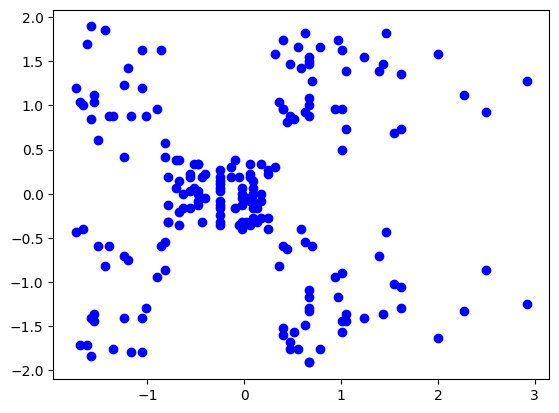

In [12]:
plt.scatter(x[:,1] , x[:,2] , color = "b")

## Clustering Using Three Features

Three different clustering algorithms were applied and compared:

- **DBSCAN** for density-based clustering
- **Agglomerative Clustering** for hierarchical structure detection
- **K-Means** for centroid-based segmentation


In [13]:
# DBSCAN
epsilon = 0.55
n_neighbors = 4
db = DBSCAN(eps = epsilon , min_samples = n_neighbors )
db.fit(x)
db_labels = db.labels_

In [14]:
db_labels

array([-1,  0, -1,  0,  0,  0, -1,  0, -1,  0, -1, -1,  1,  0, -1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  2,  0,  2,  0,  2, -1,  2,  0,  2,  0,  2,  3,  2,
        0,  2,  3,  2, -1,  2,  0,  2,  3,  2,  0,  2,  0,  2,  0,  2,  0,
        2,  0,  2,  0,  2,  0,  2, -1,  2,  3,  2,  0,  2,  0,  2,  0,  2,
        0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2, -1,  2,  0,  2, -1,
        2, -1,  2,  0, -1, -1,  2, -1, -1, -1, -1, -1, -1])

In [15]:
np.unique(db_labels  , return_counts = True)

(array([-1,  0,  1,  2,  3]), array([ 24, 130,   7,  35,   4]))

In [16]:
df["DBSCAN labels"] = db_labels

In [17]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,DBSCAN labels
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [18]:
print(df.head(15))
print("\n")
print(df.tail(15))

    CustomerID  Gender  Age  Annual Income  Spending Score  DBSCAN labels
0            1    Male   19             15              39             -1
1            2    Male   21             15              81              0
2            3  Female   20             16               6             -1
3            4  Female   23             16              77              0
4            5  Female   31             17              40              0
5            6  Female   22             17              76              0
6            7  Female   35             18               6             -1
7            8  Female   23             18              94              0
8            9    Male   64             19               3             -1
9           10  Female   30             19              72              0
10          11    Male   67             19              14             -1
11          12  Female   35             19              99             -1
12          13  Female   58           

## Determining the Optimal Number of Clusters (Elbow Method)

In K-Means clustering, the number of clusters (**K**) must be defined in advance.  
To determine the optimal value of K, the **Elbow Method** is used.

This method calculates the **Within-Cluster Sum of Squares (WCSS)** for different values of K and identifies the point where adding more clusters results in diminishing improvements.

The optimal number of clusters is selected at the point where the decrease in WCSS becomes less significant (the “elbow” point).


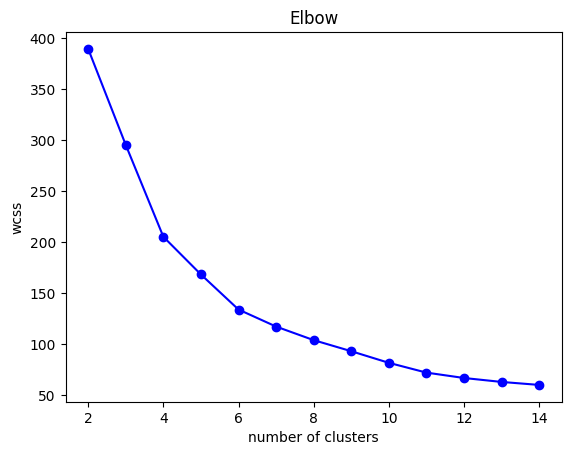

In [19]:
#KMeans
wcss = []
k_range = range(2, 15)
for k in k_range :
    km = KMeans(n_clusters = k , init = "k-means++" , n_init = 12 , random_state = 4)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(
     k_range, 
    wcss , 
    "bo-"
)
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.title("Elbow")
plt.show()

In [20]:
n = 5
km = KMeans(n_clusters = n , n_init = 20 ,init = "k-means++" , random_state = 4)
km.fit(x)
km_labels = km.labels_

In [21]:
np.unique(km_labels , return_counts = True)

(array([0, 1, 2, 3, 4], dtype=int32), array([54, 47, 40, 20, 39]))

In [22]:
df["KMeans labels"] = km_labels

In [23]:
print(df.head(15))
print("\n")
print(df.tail(15))

    CustomerID  Gender  Age  Annual Income  Spending Score  DBSCAN labels  \
0            1    Male   19             15              39             -1   
1            2    Male   21             15              81              0   
2            3  Female   20             16               6             -1   
3            4  Female   23             16              77              0   
4            5  Female   31             17              40              0   
5            6  Female   22             17              76              0   
6            7  Female   35             18               6             -1   
7            8  Female   23             18              94              0   
8            9    Male   64             19               3             -1   
9           10  Female   30             19              72              0   
10          11    Male   67             19              14             -1   
11          12  Female   35             19              99             -1   

In [24]:
# Agglomerative (Hierarchy)
clusters = 5
agglo = AgglomerativeClustering(n_clusters = clusters  , linkage = "average" )
agglo.fit(x)
agglo_labels = agglo.labels_

In [25]:
np.unique(agglo_labels , return_counts = True)

(array([0, 1, 2, 3, 4]), array([35, 52, 20, 39, 54]))

In [26]:
df["Ag_labels"] = agglo_labels

In [27]:
print(np.unique(db_labels , return_counts = True))
print(np.unique(km_labels , return_counts = True))
print(np.unique(agglo_labels , return_counts = True))

(array([-1,  0,  1,  2,  3]), array([ 24, 130,   7,  35,   4]))
(array([0, 1, 2, 3, 4], dtype=int32), array([54, 47, 40, 20, 39]))
(array([0, 1, 2, 3, 4]), array([35, 52, 20, 39, 54]))


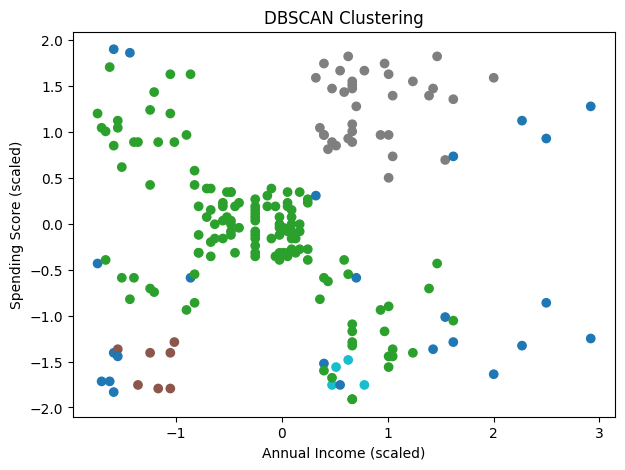

In [28]:
plt.figure(figsize=(7,5))
plt.scatter(
    x[:,1],  # Annual Income
    x[:,2],  # Spending Score
    c=db_labels,
    cmap='tab10'
)
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("DBSCAN Clustering")
plt.show()


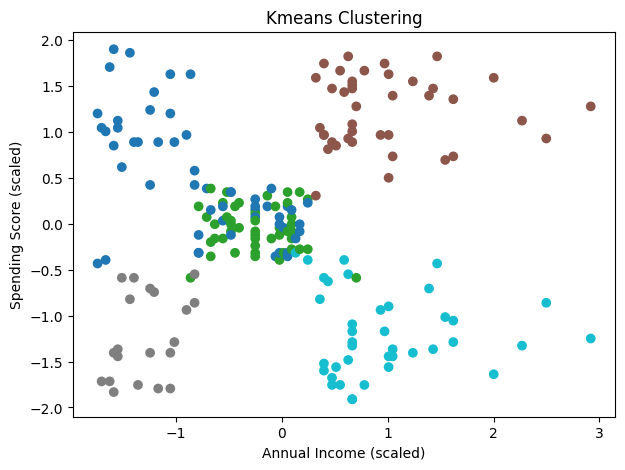

In [29]:
plt.figure(figsize=(7,5))
plt.scatter(
    x[:,1],  # Annual Income
    x[:,2],  # Spending Score
    c=km_labels,
    cmap='tab10'
)
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Kmeans Clustering")
plt.show()


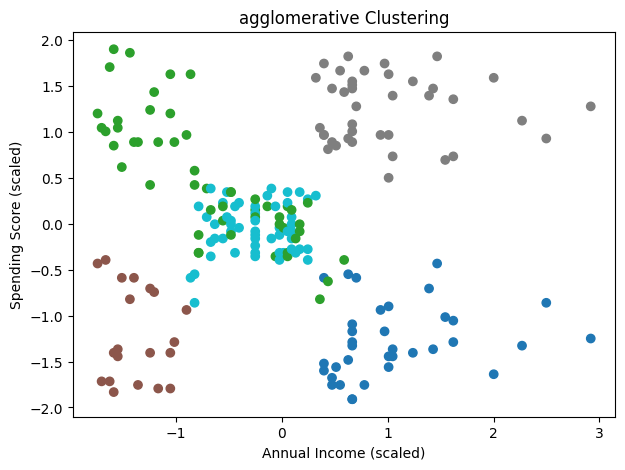

In [30]:
plt.figure(figsize=(7,5))
plt.scatter(
    x[:,1],  # Annual Income
    x[:,2],  # Spending Score
    c=agglo_labels,
    cmap='tab10'
)
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("agglomerative Clustering")
plt.show()


In [31]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix
from sklearn.metrics.pairwise import euclidean_distances
import pylab
dist_matrix = euclidean_distances(x,x) 
print(dist_matrix)

[[0.         1.63681098 1.28368768 ... 4.54611614 4.81867651 5.02250496]
 [1.63681098 0.         2.91275149 ... 4.3182849  5.31878915 4.70189264]
 [1.28368768 2.91275149 0.         ... 5.03379713 4.72114828 5.54808733]
 ...
 [4.54611614 4.3182849  5.03379713 ... 0.         2.21418015 0.5647686 ]
 [4.81867651 5.31878915 4.72114828 ... 2.21418015 0.         2.5274803 ]
 [5.02250496 4.70189264 5.54808733 ... 0.5647686  2.5274803  0.        ]]


/tmp/ipykernel_11495/15044944.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'average')


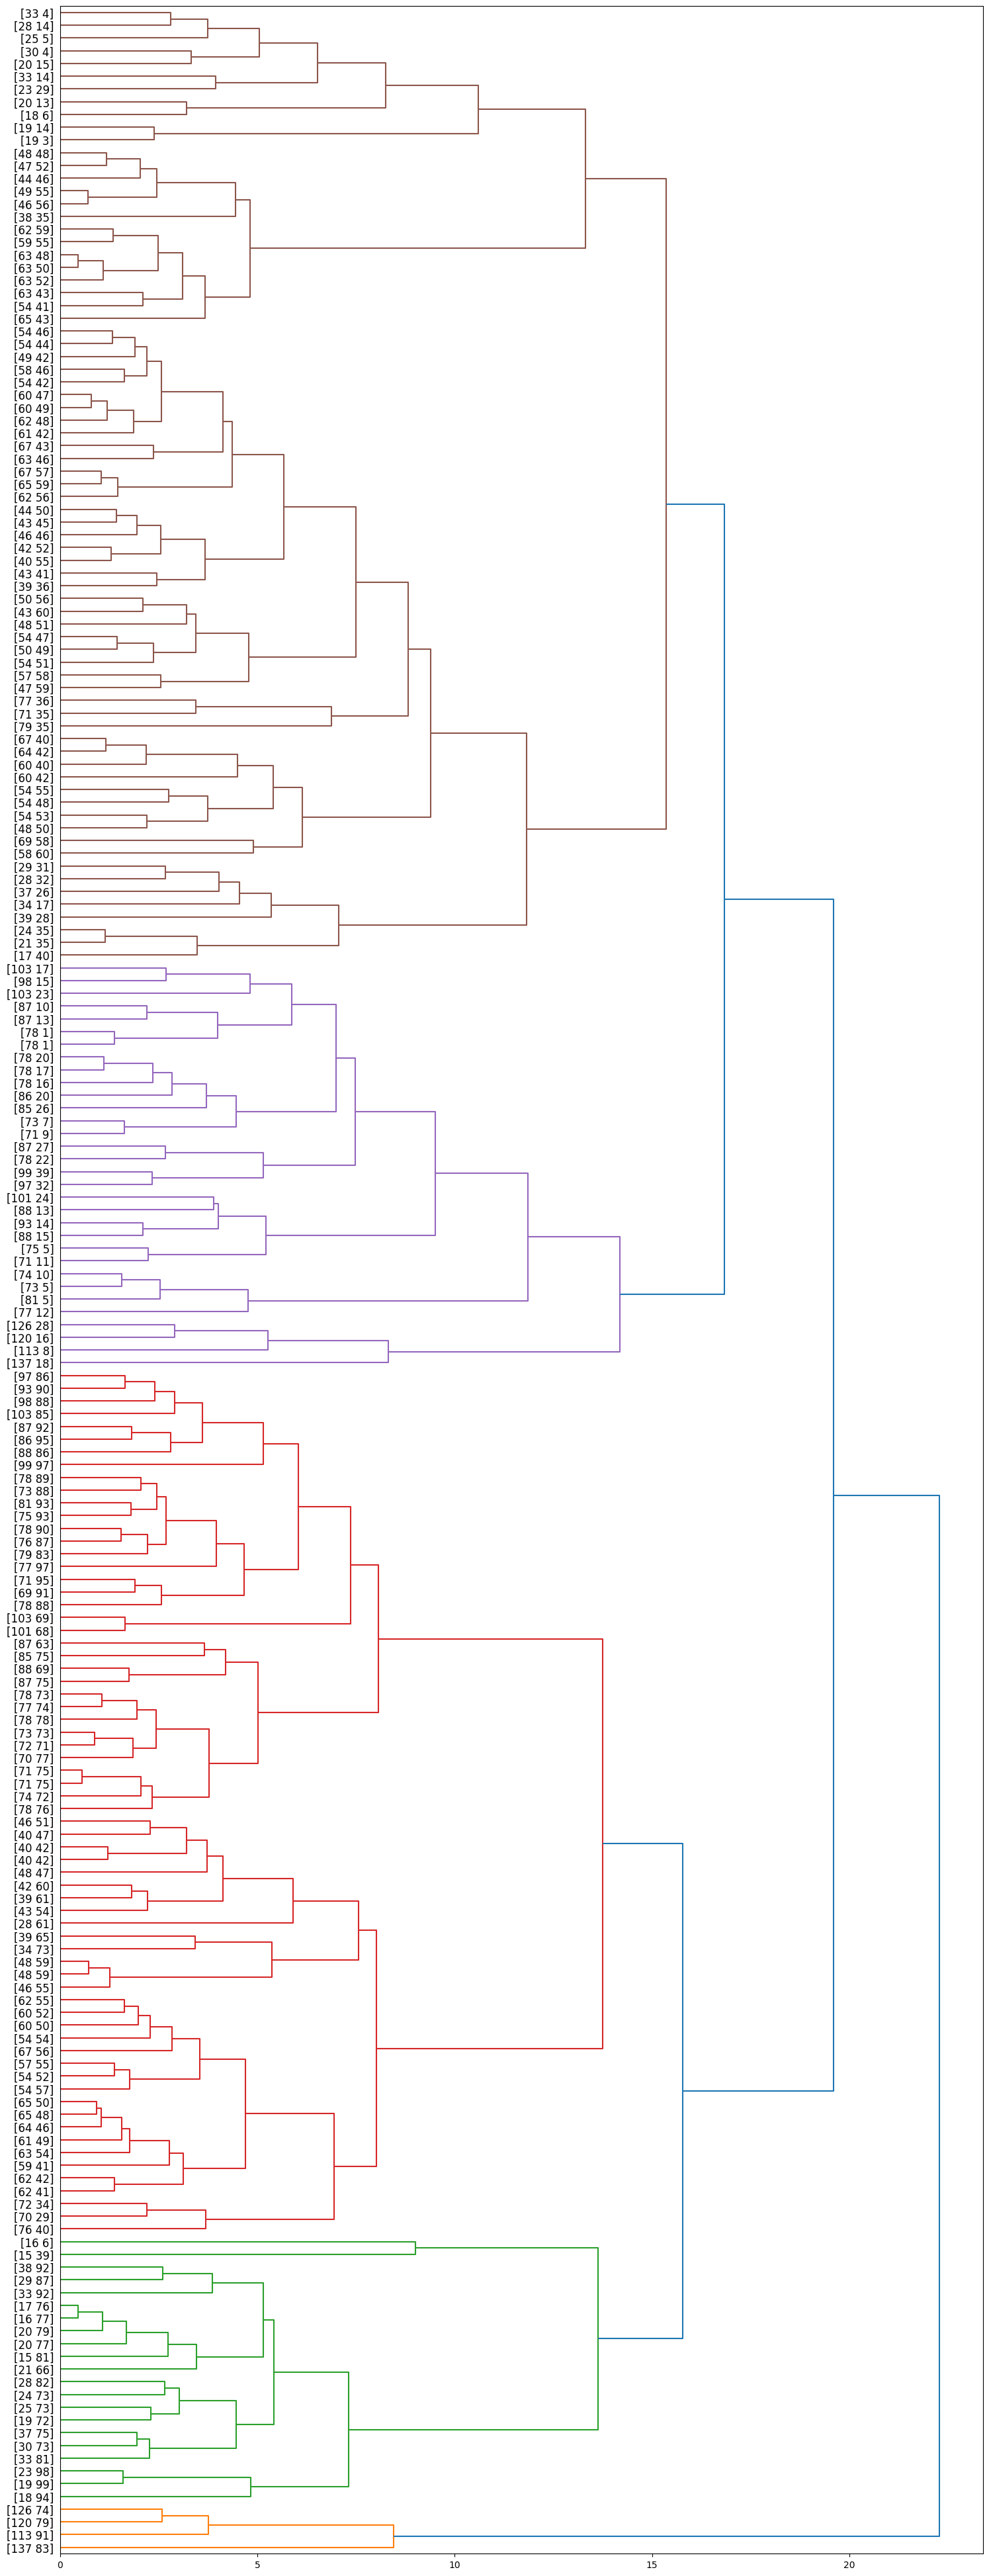

In [32]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'average')
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s]' % (df['Annual Income'][id], df['Spending Score'][id]) 
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [33]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,DBSCAN labels,KMeans labels,Ag_labels
0,1,Male,19,15,39,-1,0,2
1,2,Male,21,15,81,0,0,1
2,3,Female,20,16,6,-1,3,2
3,4,Female,23,16,77,0,0,1
4,5,Female,31,17,40,0,0,2


### This analysis allows numerical clusters to be mapped into interpretable customer segments,
such as high-income high-spending or low-value customers.


In [34]:
df.groupby("KMeans labels")[["Age", "Annual Income", "Spending Score"]].mean()

,Age,Annual Income,Spending Score
KMeans labels,,,
0,25.185185,41.092593,62.240741
1,55.638298,54.382979,48.851064
2,32.875000,86.100000,81.525000
3,46.250000,26.750000,18.350000
4,39.871795,86.102564,19.358974


In [35]:
df[df["DBSCAN labels"] != -1] \
  .groupby("DBSCAN labels")[["Age", "Annual Income", "Spending Score"]] \
  .mean()


,Age,Annual Income,Spending Score
DBSCAN labels,,,
0,39.715385,53.461538,47.569231
1,51.714286,29.000000,10.428571
2,32.742857,82.542857,82.800000
3,20.750000,76.250000,8.000000


In [36]:
df.groupby("Ag_labels")[["Age", "Annual Income", "Spending Score"]].mean()


,Age,Annual Income,Spending Score
Ag_labels,,,
0,41.685714,88.228571,17.285714
1,24.653846,42.942308,62.076923
2,43.900000,24.450000,19.100000
3,32.692308,86.538462,82.128205
4,53.259259,54.203704,48.555556


## Model Comparison

- **DBSCAN** detected dense regions but classified a significant number of customers as noise, especially in low-density income ranges.
- **Agglomerative Clustering** produced reasonable clusters but showed overlap in medium-density regions.
- **K-Means** generated balanced and well-separated clusters with clear centroids.

Although K-Means and Agglomerative Clustering appear visually similar, **K-Means provides more interpretable and business-oriented segments**.


## Feature Reduction: Business Perspective

From a business standpoint, **Age may not be a primary factor** in customer segmentation compared to income and spending behavior.

To evaluate this assumption, clustering was repeated using only:
- Annual Income
- Spending Score

This approach focuses on **customer value and purchasing behavior**, which are more actionable for marketing strategies.


In [37]:
ndf = pd.read_csv("Customer.csv")
ndf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
nx = ndf.drop(["CustomerID" , "Gender" , "Age"] , axis = 1)
nx.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [39]:
nx = nx.values

In [40]:
nScaler = StandardScaler().fit(nx)
nx = nScaler.transform(nx)

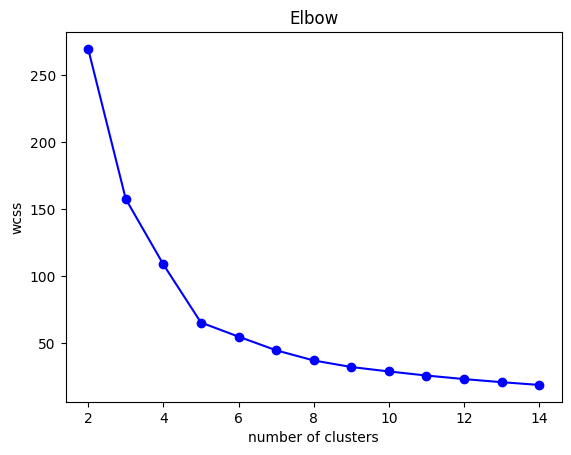

In [41]:
#KMeans
wcss = []
k_range = range(2, 15)
for k in k_range :
    km = KMeans(n_clusters = k , init = "k-means++" , n_init = 12 , random_state = 4)
    km.fit(nx)
    wcss.append(km.inertia_)

plt.plot(
     k_range, 
    wcss , 
    "bo-"
)
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.title("Elbow")
plt.show()

In [42]:
#Kmeans
n = 4
km = KMeans(n_clusters = n , n_init = 20 ,init = "k-means++" , random_state = 4)
km.fit(x)
km_labels = km.labels_

In [43]:
ndf["KMeans labels"] = km_labels
np.unique(km_labels , return_counts = True)

(array([0, 1, 2, 3], dtype=int32), array([38, 65, 40, 57]))

In [44]:
# Agglomerative (Hierarchy)
clusters = 4
agglo = AgglomerativeClustering(n_clusters = clusters  , linkage = "average" )
agglo.fit(nx)
agglo_labels = agglo.labels_

In [45]:
ndf["Ag_labels"] = agglo_labels
np.unique(agglo_labels , return_counts = True)

(array([0, 1, 2, 3]), array([ 39, 102,  38,  21]))

In [46]:
# DBSCAN
epsilon = 0.4
n_neighbors = 6
db = DBSCAN(eps = epsilon , min_samples = n_neighbors )
db.fit(nx)
db_labels = db.labels_

In [47]:
ndf["DBSCAN_labels"] = db_labels
np.unique(db_labels , return_counts = True)

(array([-1,  0,  1,  2,  3]), array([ 19, 112,  11,  32,  26]))

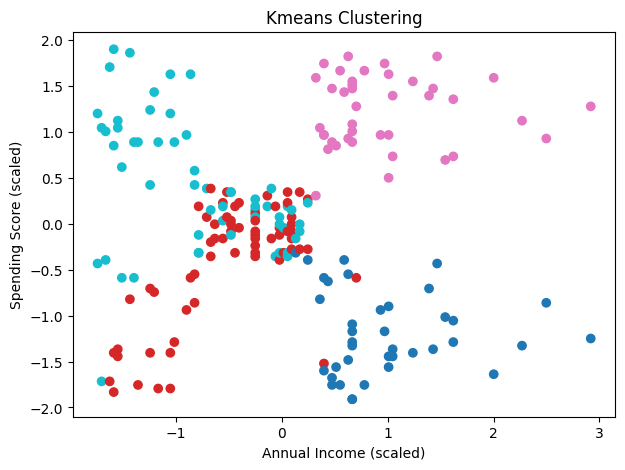

In [48]:
plt.figure(figsize=(7,5))
plt.scatter(
    nx[:,0],  # Annual Income
    nx[:,1],  # Spending Score
    c=km_labels,
    cmap='tab10'
)
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Kmeans Clustering")
plt.show()


## Feature Impact Analysis

To evaluate the contribution of the Age feature, clustering was performed using both:
- Three features: Age, Annual Income, Spending Score
- Two features: Annual Income, Spending Score

The results showed that K-Means produced nearly identical cluster structures in both cases,
indicating that Age does not significantly alter the segmentation outcome.

However, to preserve demographic information and maintain a more comprehensive feature set,
the final model was built using all three numerical features.


## Final Model Selection

Three clustering algorithms (K-Means, DBSCAN, and Agglomerative Clustering)
were evaluated for customer segmentation.

Although DBSCAN and Agglomerative Clustering were useful for exploratory analysis,
their results were unstable and less interpretable for business purposes.

K-Means demonstrated the most consistent and meaningful segmentation,
producing well-separated clusters with clear centroids.
Therefore, K-Means was selected as the final clustering model,
and only its cluster labels were retained in the final dataset.


In [49]:
df_final = df.drop(columns=["DBSCAN labels", "Ag_labels"], errors="ignore")

In [50]:
df_final.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,KMeans labels
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [51]:
cluster_names = {
    0: "Young Moderate Spenders",
    1: "Older Average Customers",
    2: "VIP Customers",
    3: "Low Income - Low Spenders",
    4: "High Income - Low Spenders"
}


In [52]:
df_final["Customer Segment"] = df_final["KMeans labels"].map(cluster_names)

In [53]:
df_final = df_final.drop(columns=["KMeans labels"])

In [56]:
df_final.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,Customer Segment
0,1,Male,19,15,39,Young Moderate Spenders
1,2,Male,21,15,81,Young Moderate Spenders
2,3,Female,20,16,6,Low Income - Low Spenders
3,4,Female,23,16,77,Young Moderate Spenders
4,5,Female,31,17,40,Young Moderate Spenders


In [58]:
df_final.to_csv("CustomerLabel.csv")

### Final Customer Segments

- **Young Moderate Spenders:** Younger customers with moderate income and relatively high spending
- **Older Average Customers:** Older customers with average income and spending behavior
- **VIP Customers:** High-income customers with very high spending
- **Low Income – Low Spenders:** Customers with low income and minimal spending
- **High Income – Low Spenders:** High-income customers with low spending, representing strong upselling potential
